In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('glassdoor_jobs.csv')
df.head()

,job_title,salary_estimate,job_description,rating,company_name,location,job_age,size,founded,type_of_ownership,...,aws_yn,pytorch_yn,tf_yn,ml_yn,pbi_tableau_yn,stats_yn,sql_yn,experience_level,job_simp,country
0,Business Analyst/Data Analyst,BHD 2K (Employer est.),Total 4 - 6 years of experience.\n5+years of K...,-1.0,Unity Infotech Solutions,Manama,30d+,-1,-1,-1,...,0,0,0,0,0,0,1,other,analyst,BH
1,QA Analyst,BHD 400 (Employer est.),About the role: QA Analyst is a member of the ...,-1.0,Bahrain Financing Company,Manama,30d+,-1,-1,-1,...,0,0,0,0,0,0,1,other,analyst,BH
2,Machine Learning Engineer,BHD 1K - BHD 2K (Employer est.),"WalletHub, the #1 Personal Finance App in the ...",4.2,WalletHub,Manama,23d,51 to 200 Employees,2012,Company - Private,...,0,0,0,1,0,1,1,other,machine learning engineer,BH
3,Data Analytics,-1,Please Note : Candidate should be available to...,3.8,Brunel,Kuwait City,30d+,10000+ Employees,1975,Company - Public,...,0,0,0,1,0,0,1,other,other,KW
4,Information System Analyst and Consultants,OMR 1K (Employer est.),Attend Mega Canada Job fair on 20th November. ...,-1.0,Can Axis Management & Immigration,Muscat,30d+,-1,-1,-1,...,0,0,0,0,0,0,0,other,analyst,OM


In [8]:
# # add experience level column
df['experience_level'] = df['job_title'].apply(lambda x: \
            'junior' if 'junior' in x.lower() or 'jr' in x.lower() else 'senior' if 'senior' in x.lower() or 'expert' in x.lower()\
                or 'lead' in x.lower() or 'principal' in x.lower()  else 'na')
df['experience_level'].value_counts()

na        45
senior     4
junior     1
Name: experience_level, dtype: int64

In [4]:
# # add job simplified column
df['job_simp'] = df['job_title'].apply(lambda x: \
            'analyst' if 'analyst' in x.lower() else 'data engineer' if 'data engineer' in x.lower() else 'data scientist' if 'data scientist' in x.lower()\
                else 'director' if 'director' in x.lower() else 'manager' if 'manager' in x.lower() else 'machine learning engineer' if \
                    'machine learning engineer' in x.lower() else 'researcher' if 'research' in x.lower() else 'other')
df['job_simp'].value_counts()

analyst                      32
other                         9
data scientist                5
machine learning engineer     3
researcher                    1
Name: job_simp, dtype: int64

In [10]:
df.columns

Index(['job_title', 'salary_estimate', 'job_description', 'rating',
       'company_name', 'location', 'job_age', 'size', 'founded',
       'type_of_ownership', 'industry', 'sector', 'revenue', 'competitors',
       'date_scrapped', 'salary_description', 'hourly', 'annually', 'salary',
       'currency', 'min_salary', 'max_salary', 'avg_salary',
       'older_than_30_days', 'job_fam', 'company_age', 'python_yn', 'r_yn',
       'spark_yn', 'aws_yn', 'pytorch_yn', 'tf_yn', 'ml_yn', 'pbi_tableau_yn',
       'stats_yn', 'sql_yn', 'experience_level', 'job_simp', 'country'],
      dtype='object')

In [6]:
# add job description length column
df['desc_len'] = df.job_description.apply(lambda x: len(x))

# remove new line character and rating from company name
df['company_name'] = df['company_name'].apply(lambda x: x.split('\n')[0] if len(x.split('\n'))>1 else x)

In [11]:
df[['job_title', 'salary_estimate', 'salary_description', 'hourly', 'annually',\
       'salary', 'currency', 'min_salary', 'max_salary', 'avg_salary']]

,job_title,salary_estimate,salary_description,hourly,annually,salary,currency,min_salary,max_salary,avg_salary
0,Business Analyst/Data Analyst,BHD 2K (Employer est.),-1,0,0,BHD 2K,bhd,19520.000,19520.000000,19520.000000
1,QA Analyst,BHD 400 (Employer est.),-1,0,0,BHD 400,bhd,3904.000,3904.000000,3904.000000
2,Machine Learning Engineer,BHD 1K - BHD 2K (Employer est.),-1,0,0,BHD 1K - BHD 2K,bhd,9760.000,19520.000000,14640.000000
3,Data Analytics,-1,KD100.000 - KD750.000 per month,0,0,KD100.000 - KD750.000 per month,kd,1200.000,9000.000000,5100.000000
4,Information System Analyst and Consultants,OMR 1K (Employer est.),-1,0,0,OMR 1K,omr,9570.000,9570.000000,9570.000000
5,Data Analyst,QAR 4K (Employer est.),-1,0,0,QAR 4K,qar,4040.000,4040.000000,4040.000000
6,Market Research Analyst,QAR 5K - QAR 8K (Employer est.),-1,0,0,QAR 5K - QAR 8K,qar,5050.000,8080.000000,6565.000000
7,MIS & Data Analyst,QAR 7K - QAR 7K (Employer est.),-1,0,0,QAR 7K - QAR 7K,qar,7070.000,7070.000000,7070.000000
8,Market Analyst,QAR 5K (Employer est.),-1,0,0,QAR 5K,qar,5050.000,5050.000000,5050.000000
9,Investment Analyst - Qatar,QAR 25K - QAR 38K (Employer est.),-1,0,0,QAR 25K - QAR 38K,qar,25250.000,38380.000000,31815.000000


In [ ]:
# save new dataframe
df.to_csv('data_eda.csv')

In [19]:
df.iloc[:, df.columns.str.contains('yn')].sum().sort_values(ascending=False)

stats_yn          10
sql_yn             7
ml_yn              6
python_yn          5
spark_yn           2
aws_yn             2
pbi_tableau_yn     2
tf_yn              1
r_yn               0
pytorch_yn         0
dtype: int64

In [20]:
df.describe()

,rating,founded,competitors,hourly,annually,min_salary,max_salary,avg_salary,older_than_30_days,company_age,python_yn,r_yn,spark_yn,aws_yn,pytorch_yn,tf_yn,ml_yn,pbi_tableau_yn,stats_yn,sql_yn
count,50.000000,50.000000,50.0,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.0,50.000000,50.000000,50.0,50.000000,50.000000,50.000000,50.000000,50.00000
mean,0.210000,199.680000,-1.0,0.060000,0.040000,12118.051120,15561.983787,13840.017453,0.420000,0.820000,0.100000,0.0,0.040000,0.040000,0.0,0.020000,0.120000,0.040000,0.200000,0.14000
std,2.078584,608.173493,0.0,0.239898,0.197949,11510.587644,12640.983443,11886.791889,0.498569,7.501537,0.303046,0.0,0.197949,0.197949,0.0,0.141421,0.328261,0.197949,0.404061,0.35051
min,-1.000000,-1.000000,-1.0,0.000000,0.000000,1200.000000,3904.000000,3904.000000,0.000000,-1.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000
25%,-1.000000,-1.000000,-1.0,0.000000,0.000000,5050.000000,7302.500000,6673.750000,0.000000,-1.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000
50%,-1.000000,-1.000000,-1.0,0.000000,0.000000,8570.528000,12000.000000,10000.000000,0.000000,-1.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000
75%,2.075000,-1.000000,-1.0,0.000000,0.000000,13855.000000,19520.000000,17779.050000,1.000000,-1.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000
max,5.000000,2019.000000,-1.0,1.000000,1.000000,72720.000000,72720.000000,72720.000000,1.000000,48.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.00000


<AxesSubplot:>

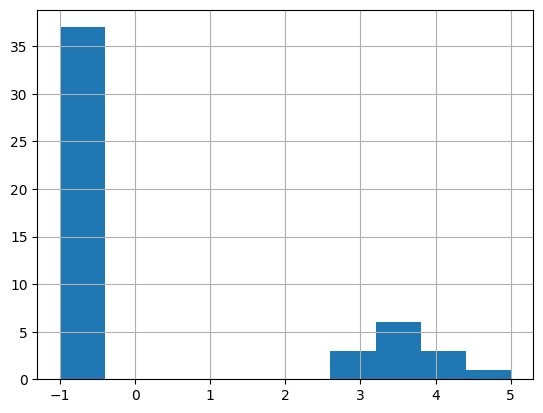

In [21]:
df.rating.hist()

<AxesSubplot:>

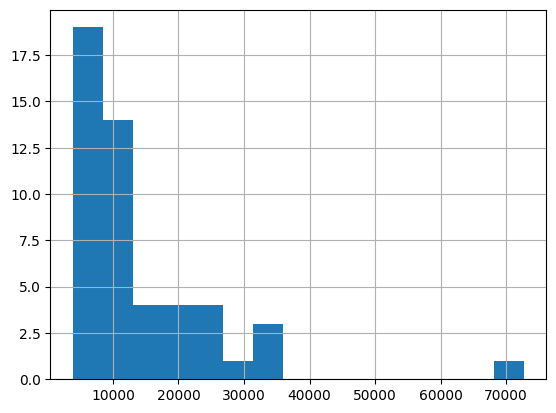

In [22]:
df.avg_salary.hist(bins=15)

<AxesSubplot:>

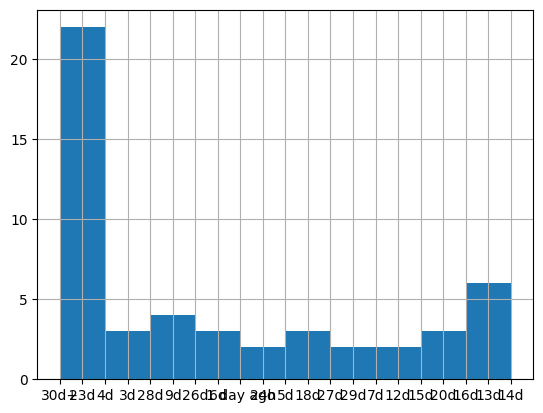

In [24]:
df.job_age.hist()

<AxesSubplot:>

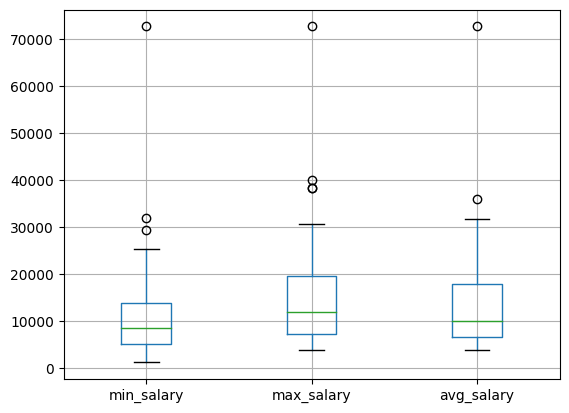

In [26]:
# see salary boxplots
df.boxplot(column=['min_salary', 'max_salary', 'avg_salary'])

<AxesSubplot:>

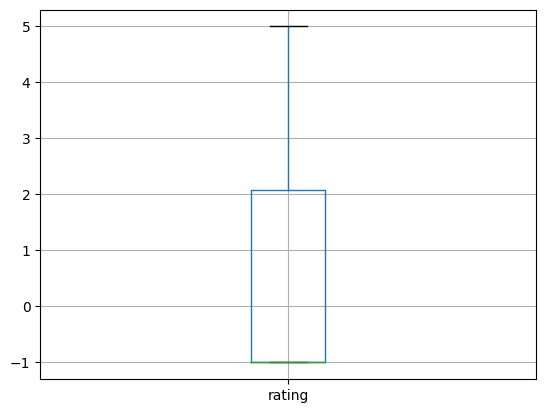

In [27]:
df.boxplot(column=['rating'])

<AxesSubplot:>

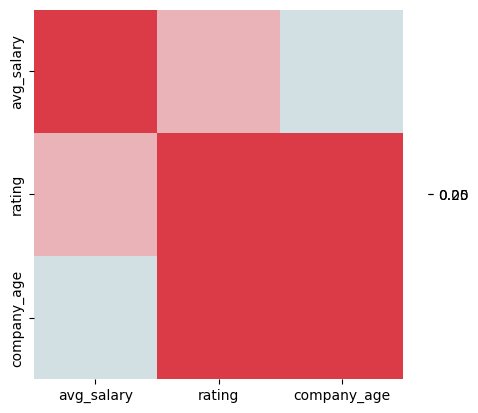

In [29]:
corr = df[[ 'avg_salary', 'rating',  'company_age']].corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, vmax=.3, center=0, cmap=cmap, square=True, linewidths=.0, cbar_kws={"shrink":.0})

In [30]:
df.columns

Index(['job_title', 'salary_estimate', 'job_description', 'rating',
       'company_name', 'location', 'job_age', 'size', 'founded',
       'type_of_ownership', 'industry', 'sector', 'revenue', 'competitors',
       'date_scrapped', 'salary_description', 'hourly', 'annually', 'salary',
       'currency', 'min_salary', 'max_salary', 'avg_salary',
       'older_than_30_days', 'job_fam', 'company_age', 'python_yn', 'r_yn',
       'spark_yn', 'aws_yn', 'pytorch_yn', 'tf_yn', 'ml_yn', 'pbi_tableau_yn',
       'stats_yn', 'sql_yn', 'experience_level', 'job_simp', 'country'],
      dtype='object')

location: total = 9


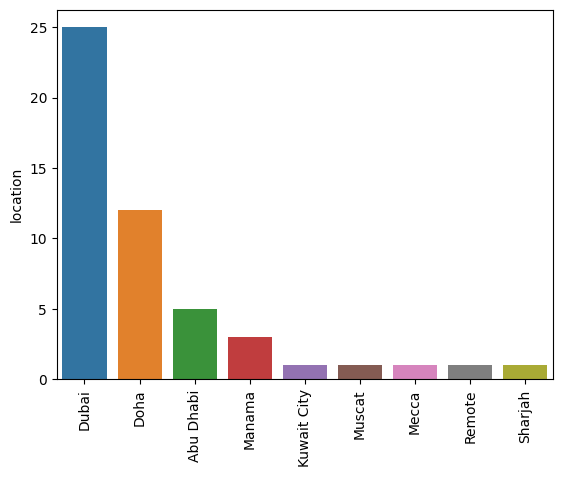

size: total = 7


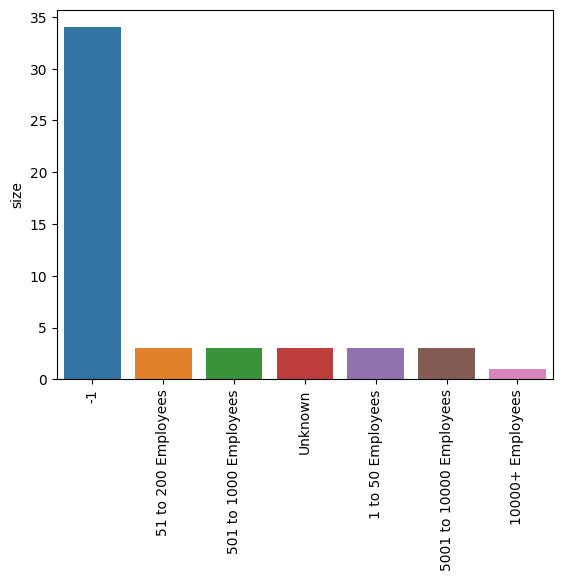

type_of_ownership: total = 5


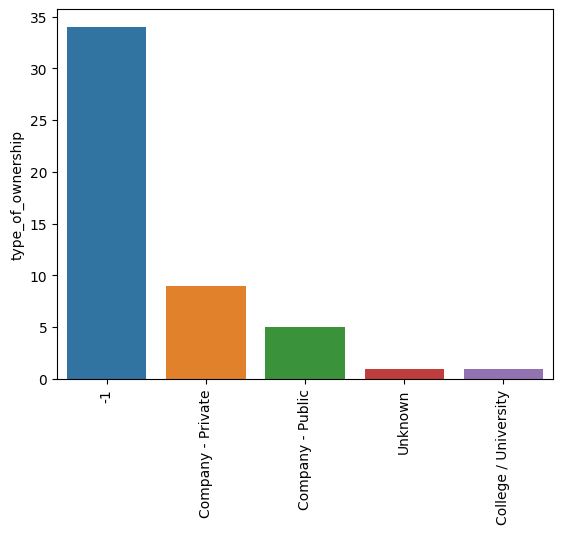

revenue: total = 5


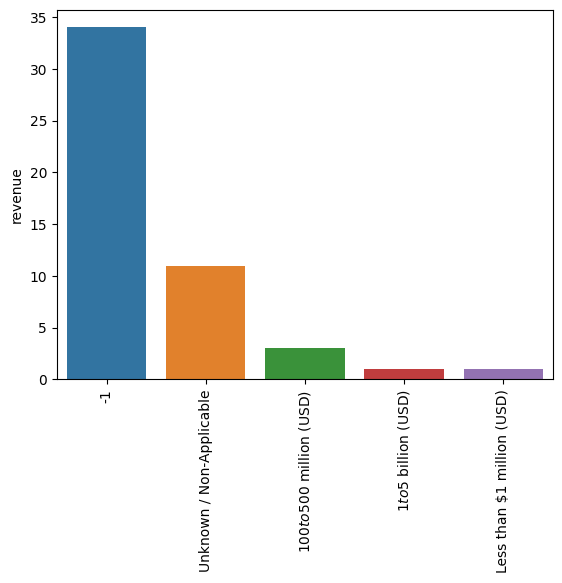

job_fam: total = 4


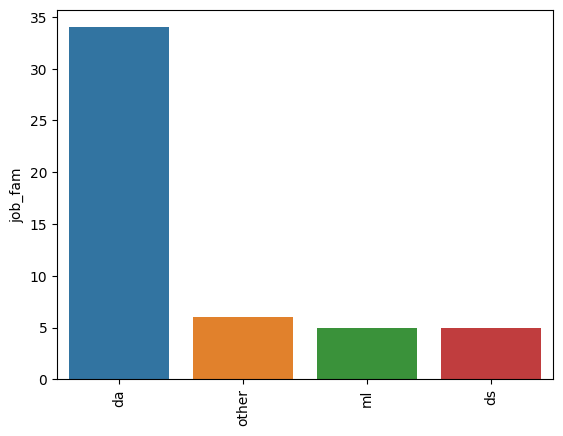

job_simp: total = 5


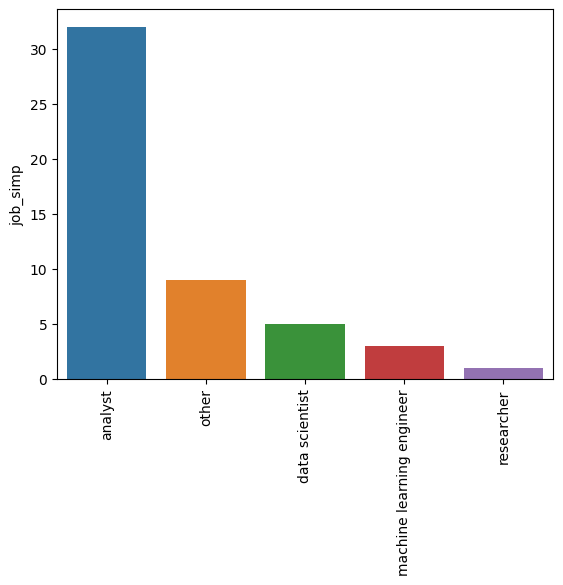

ml_yn: total = 2


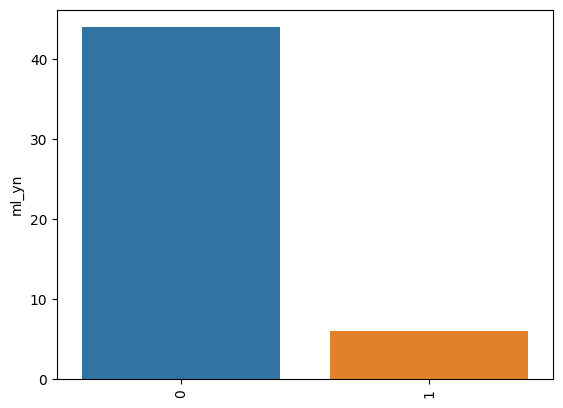

experience_level: total = 3


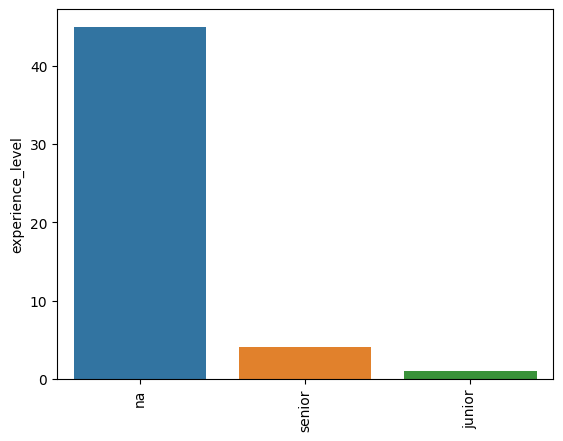

industry: total = 6


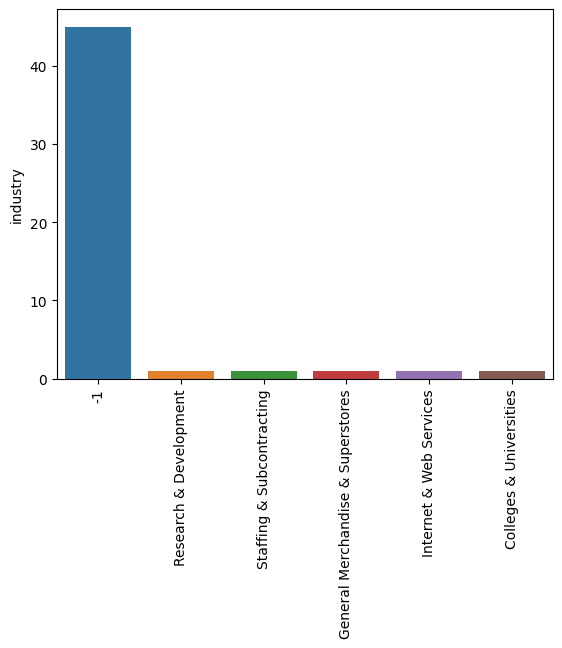

company_name: total = 45


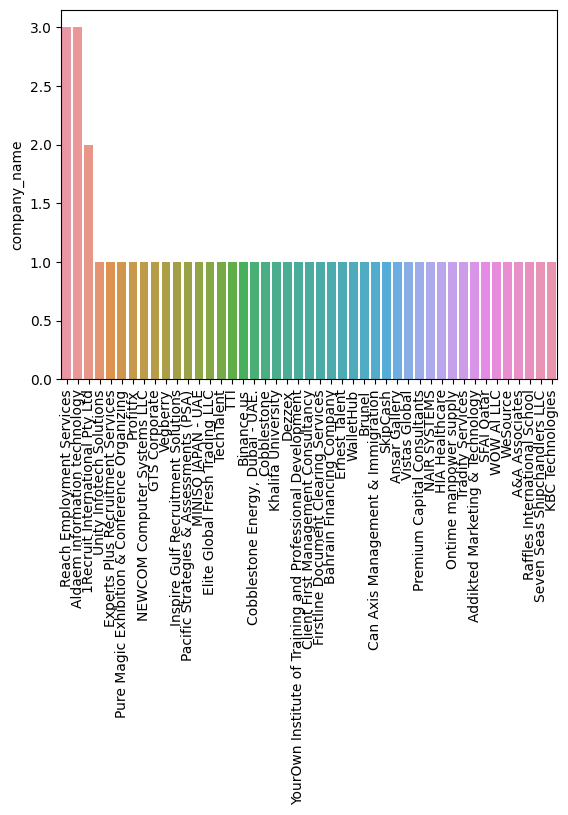

In [31]:
df_cat = df[['location', 'size', 'type_of_ownership', 'revenue', 'job_fam', 'job_simp', 'ml_yn', 'experience_level', 'industry', 'company_name']]

for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("{}: total = {}".format(i, len(cat_num)))
    plot = sns.barplot(x=cat_num.index, y=cat_num)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
    plt.show()

In [32]:
pd.pivot_table(df, index='job_fam', values='avg_salary')

,avg_salary
job_fam,
da,10061.747059
ds,24022.083333
ml,13328.000000
other,27191.842667


In [33]:
pd.pivot_table(df, index=['job_simp', 'experience_level'], values='avg_salary')

avg_salary
job_simp                  experience_level              
analyst                   na                10199.825000
data scientist            junior            18350.000000
                          na                21920.138889
                          senior            36000.000000
machine learning engineer na                15546.666667
other                     na                18677.676000
                          senior            21430.000000
researcher                na                22500.000000

In [34]:
pd.pivot_table(df, index=['location', 'job_simp'], values='avg_salary').sort_values('location', ascending=False)

avg_salary
location    job_simp                               
Sharjah     data scientist             18350.000000
Remote      analyst                    18150.400000
Muscat      analyst                     9570.000000
Mecca       other                       8141.056000
Manama      machine learning engineer  14640.000000
            analyst                    11712.000000
Kuwait City other                       5100.000000
Dubai       other                       7750.000000
            machine learning engineer  16000.000000
            data scientist             28920.138889
            analyst                     7694.444444
Doha        other                      37538.333333
            analyst                    14027.777778
Abu Dhabi   data scientist             15000.000000
            researcher                 22500.000000
            other                      17500.000000
            analyst                    10500.000000

In [35]:
df.columns

Index(['job_title', 'salary_estimate', 'job_description', 'rating',
       'company_name', 'location', 'job_age', 'size', 'founded',
       'type_of_ownership', 'industry', 'sector', 'revenue', 'competitors',
       'date_scrapped', 'salary_description', 'hourly', 'annually', 'salary',
       'currency', 'min_salary', 'max_salary', 'avg_salary',
       'older_than_30_days', 'job_fam', 'company_age', 'python_yn', 'r_yn',
       'spark_yn', 'aws_yn', 'pytorch_yn', 'tf_yn', 'ml_yn', 'pbi_tableau_yn',
       'stats_yn', 'sql_yn', 'experience_level', 'job_simp', 'country'],
      dtype='object')

In [36]:
# rating, industry, revenue, job_fam, job_simp, experience_level, ml_yn, size, job_age, type_of_ownership, desc_len

df_pivots = df[['avg_salary', 'rating', 'industry', 'revenue', 'job_fam', 'job_simp', 'experience_level', 'ml_yn', 'size', \
                 'type_of_ownership', 'older_than_30_days']]

for i in df_pivots.drop(columns=['avg_salary']).columns:
    print(i)
    print(pd.pivot_table(df_pivots, index=i, values='avg_salary').sort_values('avg_salary', ascending=False))

rating
          avg_salary
rating              
 5.0    26760.416667
 3.7    24250.000000
 3.1    16666.666667
 3.6    14785.000000
 4.2    14640.000000
-1.0    13214.336649
 3.5    13000.000000
 3.9     8500.000000
 3.2     7000.000000
 3.8     5100.000000
industry
                                     avg_salary
industry                                       
Internet & Web Services            36000.000000
Colleges & Universities            22500.000000
Research & Development             14640.000000
-1                                 13483.574948
General Merchandise & Superstores   7000.000000
Staffing & Subcontracting           5100.000000
revenue
                              avg_salary
revenue                                 
$100 to $500 million (USD)  16666.666667
Unknown / Non-Applicable    16179.128788
-1                          13292.072235
Less than $1 million (USD)   7000.000000
$1 to $5 billion (USD)       5100.000000
job_fam
           avg_salary
job_fam              
o

In [ ]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import nltk
# nltk.download('stopwords')
# nltk.download('words')
nltk.download('all')

In [38]:
eng_words = set(nltk.corpus.words.words())
eng_words = set(nltk.corpus.words.words())
words = ' '.join(df['job_description'])
words = [x.lower() for x in words.split() if x.lower() in eng_words]
words = ' '.join(words)

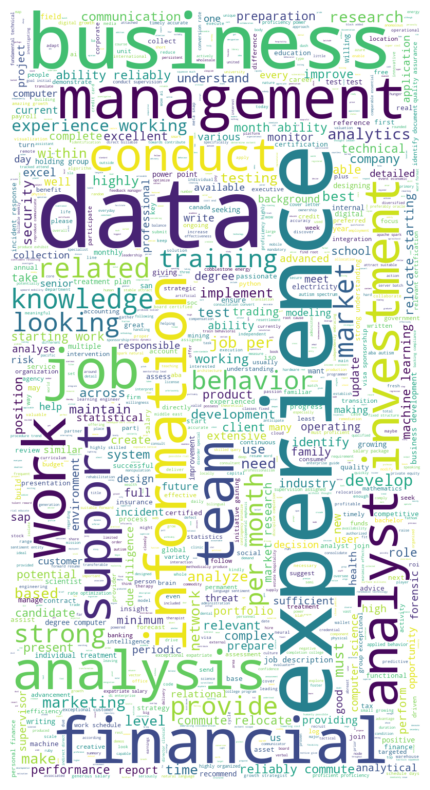

In [39]:
def punctuation_stop(text):
    # remove punctuation and stop words
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered

words_filtered = punctuation_stop(words)
text = ' '.join([ele for ele in words_filtered])

wc = WordCloud(background_color='white', random_state=1, stopwords=STOPWORDS, max_words=2000, width=800, height=1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()